# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales 2025-I*

---

# 1.

<center>

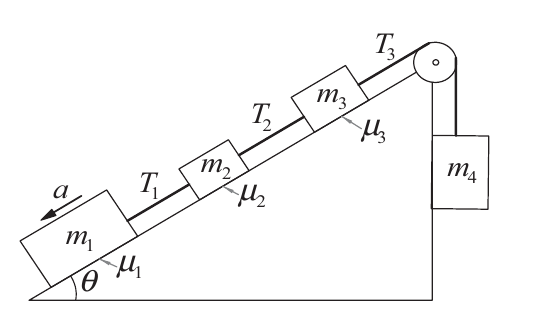

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [1]:
#Aquí va su código
import numpy as np

# Datos
g = 9.81
theta = np.radians(45)

# Masas y coeficientes de fricción
m = np.array([10, 4, 5, 6])
mu = np.array([0.25, 0.3, 0.2])

# Matriz A
A = np.array([
    [1,  0,  0, m[0]],
    [-1, 1,  0, m[1]],
    [0, -1,  1, m[2]],
    [0,  0, -1, m[3]]
])

# Vector b
b = np.array([
    m[0]*g*(np.sin(theta) - mu[0]*np.cos(theta)),
    m[1]*g*(np.sin(theta) - mu[1]*np.cos(theta)),
    m[2]*g*(np.sin(theta) - mu[2]*np.cos(theta)),
    -m[3]*g
])

# Resolver el sistema
x = np.linalg.solve(A, b)

# Resultados
T1, T2, T3, a = x
print(f"Aceleración: {a:.4f} m/s^2")
print(f"Tensión T1: {T1:.2f} N")
print(f"Tensión T2: {T2:.2f} N")
print(f"Tensión T3: {T3:.2f} N")

Aceleración: 1.6134 m/s^2
Tensión T1: 35.89 N
Tensión T2: 48.86 N
Tensión T3: 68.54 N


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

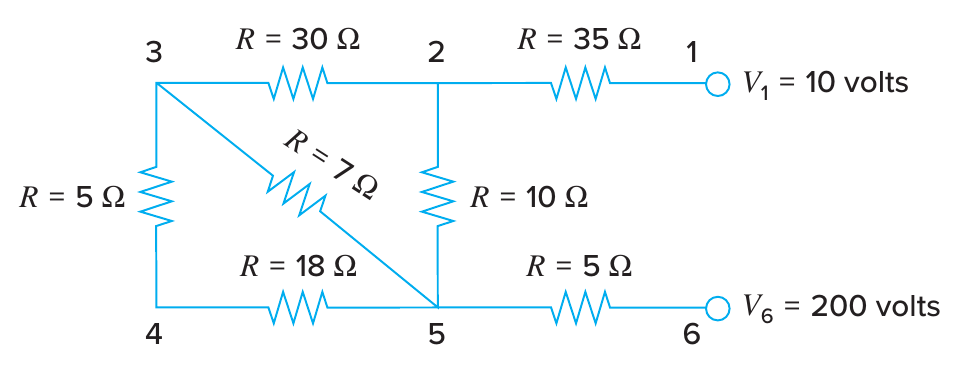


In [3]:
#Aquí va su código
import numpy as np

# Matriz A del sistema (6 ecuaciones x 7 incógnitas)
A = np.array([
    [ 1, -1, -1,  0,  0,  0,  0],   # (1) Nodo 2
    [ 0,  1,  0, -1,  0, -1,  0],   # (2) Nodo 3
    [ 0,  0,  1,  0,  1,  1, -1],   # (3) Nodo 5
    [-35, 30,  0,  0,  0,  7,  0],  # (4) Rama 1-2-3-5
    [ 0,  0,  0,  5, 18, -7,  0],   # (5) Rama 3-4-5
    [-35, 0, 10, 0,  0,  0,  5],    # (6) Rama 1-2-5-6
])

# Vector b
b = np.array([
    0,   # Nodo 2
    0,   # Nodo 3
    0,   # Nodo 5
    0,   # Rama 1
    0,   # Rama 2
   -190  # Rama 3
])

# Resolver por mínimos cuadrados
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Asignar los nombres
i12, i23, i25, i34, i45, i35, i56 = x

# Resultados
print(f"i_12 = {i12:.4f} A")
print(f"i_23 = {i23:.4f} A")
print(f"i_25 = {i25:.4f} A")
print(f"i_34 = {i34:.4f} A")
print(f"i_45 = {i45:.4f} A")
print(f"i_35 = {i35:.4f} A")
print(f"i_56 = {i56:.4f} A")

i_12 = 5.3102 A
i_23 = 5.8548 A
i_25 = -0.5446 A
i_34 = 4.3957 A
i_45 = -0.6536 A
i_35 = 1.4591 A
i_56 = 0.2609 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

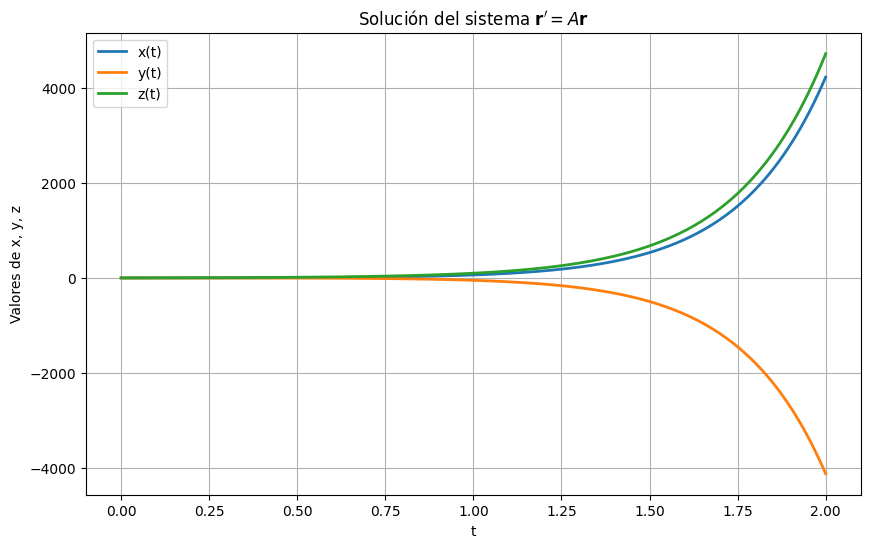

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Matriz A
A = np.array([[2, -1, 1],
              [0,  3, -1],
              [2,  1,  3]])

# Condición inicial
r0 = np.array([1, 1, 2])

# Diagonalización
eigvals, U = np.linalg.eig(A)
D = np.diag(eigvals)
U_inv = np.linalg.inv(U)

# Definimos función r(t) = e^{At} r0 = U e^{Dt} U^{-1} r0
def r(t):
  """
    Calcula el vector solución r(t) = [x(t), y(t), z(t)] para el sistema r' = A r.

    Usa la diagonalización A = U D U⁻¹ y la fórmula:
    r(t) = U e^{D t} U⁻¹ r₀
  """
  expDt = np.diag(np.exp(eigvals * t))  # e^{Dt}
  return U @ expDt @ U_inv @ r0

# Tiempo en [0, 2]
t_vals = np.linspace(0, 2, 200)
x_vals, y_vals, z_vals = [], [], []

for t in t_vals:
    r_t = r(t)
    x_vals.append(r_t[0])
    y_vals.append(r_t[1])
    z_vals.append(r_t[2])

# Graficar
plt.figure(figsize=(10,6))
plt.plot(t_vals, x_vals, label='x(t)', linewidth=2)
plt.plot(t_vals, y_vals, label='y(t)', linewidth=2)
plt.plot(t_vals, z_vals, label='z(t)', linewidth=2)
plt.title("Solución del sistema $\mathbf{r}' = A\mathbf{r}$")
plt.xlabel("t")
plt.ylabel("Valores de x, y, z")
plt.legend()
plt.grid(True)
plt.show()

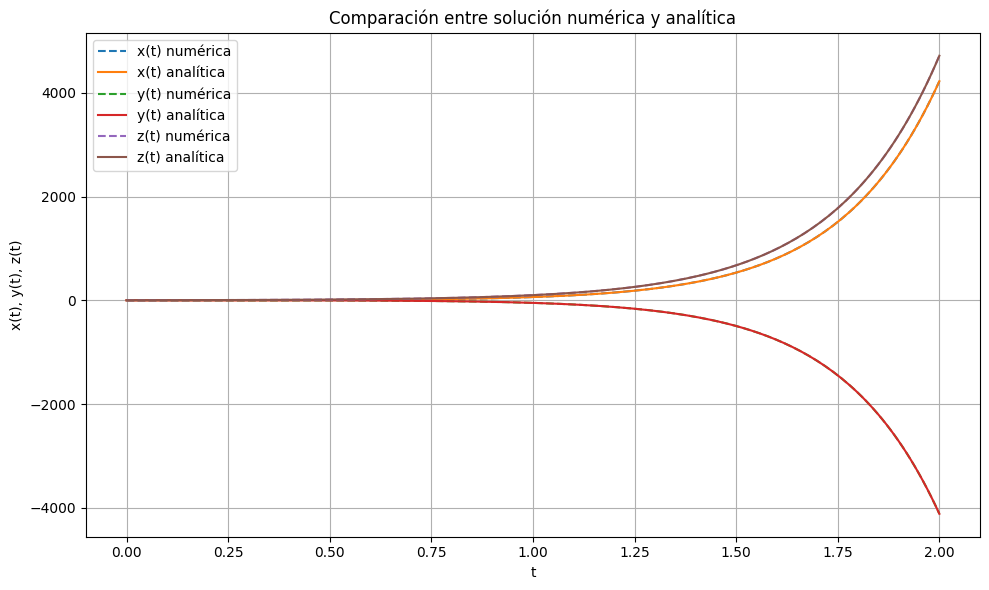

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Condición inicial
x0, y0, z0 = 1, 1, 2

# Solución analítica del sistema
def solucion_analitica(t):
    """
    Calcula la solución analítica del sistema en el tiempo t.

    Fórmulas dadas:
    2x = x0(e^{2t}(1 + e^{2t} - 2t)) + y0(-2t e^{2t}) + z0(e^{2t}(-1 + e^{2t}))
    2y = x0(-e^{2t}(-1 + e^{2t} - 2t)) + y0(2(t + 1)e^{2t}) + z0(-e^{2t}(-1 + e^{2t}))
    2z = x0(e^{2t}(-1 + e^{2t} + 2t)) + y0(2t e^{2t}) + z0(e^{2t}(1 + e^{2t}))

    Devuelve:
    (x(t), y(t), z(t))
    """
    exp2t = np.exp(2 * t)
    exp4t = exp2t ** 2

    x = 0.5 * (x0 * exp2t * (1 + exp2t - 2 * t) +
               y0 * (-2 * t * exp2t) +
               z0 * exp2t * (-1 + exp2t))

    y = 0.5 * (-x0 * exp2t * (-1 + exp2t - 2 * t) +
               y0 * 2 * (t + 1) * exp2t +
               -z0 * exp2t * (-1 + exp2t))

    z = 0.5 * (x0 * exp2t * (-1 + exp2t + 2 * t) +
               y0 * 2 * t * exp2t +
               z0 * exp2t * (1 + exp2t))

    return x, y, z

# Solución numérica desde la diagonalización
A = np.array([[2, -1, 1],
              [0,  3, -1],
              [2,  1,  3]])
r0 = np.array([x0, y0, z0])
eigvals, U = np.linalg.eig(A)
D = np.diag(eigvals)
U_inv = np.linalg.inv(U)

def solucion_numerica(t):
    """
    Calcula r(t) usando la diagonalización: r(t) = U e^{Dt} U⁻¹ r0
    """
    expDt = np.diag(np.exp(eigvals * t))
    return U @ expDt @ U_inv @ r0

# Comparar ambas soluciones en [0, 2]
t_vals = np.linspace(0, 2, 200)
x_num, y_num, z_num = [], [], []
x_ana, y_ana, z_ana = [], [], []

for t in t_vals:
    r = solucion_numerica(t)
    x, y, z = solucion_analitica(t)

    x_num.append(r[0])
    y_num.append(r[1])
    z_num.append(r[2])

    x_ana.append(x)
    y_ana.append(y)
    z_ana.append(z)

# Gráfica de comparación
plt.figure(figsize=(10,6))
plt.plot(t_vals, x_num, '--', label='x(t) numérica')
plt.plot(t_vals, x_ana, '-',  label='x(t) analítica')
plt.plot(t_vals, y_num, '--', label='y(t) numérica')
plt.plot(t_vals, y_ana, '-',  label='y(t) analítica')
plt.plot(t_vals, z_num, '--', label='z(t) numérica')
plt.plot(t_vals, z_ana, '-',  label='z(t) analítica')

plt.title("Comparación entre solución numérica y analítica")
plt.xlabel("t")
plt.ylabel("x(t), y(t), z(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [12]:
#Aquí va su código
import numpy as np

# Parámetros físicos

hbar = 1                # unidades naturales
gamma = 2               # giromagnética del electrón
B = np.array([0, 0, 1]) # campo magnético: B = (Bx, By, Bz)

# Construcción del Hamiltoniano
def hamiltoniano(Bx, By, Bz):
    """
    Devuelve el Hamiltoniano de espín de un electrón en un campo magnético (Bx, By, Bz),
    usando la expresión:

    H = - (γ ℏ / 2) * [[Bz, Bx - i By], [Bx + i By, -Bz]]
    """
    H = - (gamma * hbar / 2) * np.array([
        [Bz, Bx - 1j * By],
        [Bx + 1j * By, -Bz]
    ])
    return H

# Matriz Hamiltoniana
H = hamiltoniano(*B)

# Verificar si es Hermítica
def es_hermitica(H):
    """
    Verifica si la matriz H es hermítica: H† = H
    """
    return np.allclose(H, H.conj().T)

print("Hamiltoniano H:\n", H)
print("\n¿Es H hermítica?:", es_hermitica(H))

# Calcular niveles de energía
autovalores, autovectores = np.linalg.eigh(H)  # eigh usado porque H es hermítica

print("\nNiveles de energía permitidos (autovalores):")
for i, E in enumerate(autovalores):
    print(f"E{i+1} = {E:.4f}")

# Autovectores normalizados
print("\nAutovectores normalizados (columnas):")
for i, vec in enumerate(autovectores.T):
    norma = np.vdot(vec, vec).real
    print(f"v{i+1} = {vec},  ||v{i+1}||² = {norma:.4f}")

Hamiltoniano H:
 [[-1.+0.j -0.+0.j]
 [-0.+0.j  1.-0.j]]

¿Es H hermítica?: True

Niveles de energía permitidos (autovalores):
E1 = -1.0000
E2 = 1.0000

Autovectores normalizados (columnas):
v1 = [1.+0.j 0.+0.j],  ||v1||² = 1.0000
v2 = [0.+0.j 1.+0.j],  ||v2||² = 1.0000


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

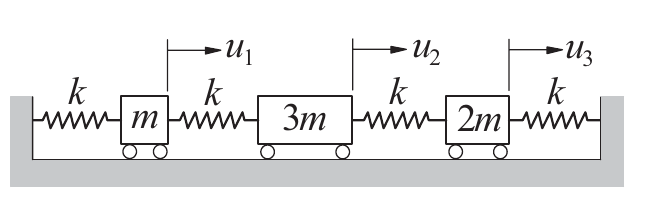
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

Frecuencias naturales (en unidades de sqrt(k/m)):
ω_1 = 0.5028
ω_2 = 1.0867
ω_3 = 1.4943

Formas modales (columnas):
[[-0.27851068 -0.27460877 -0.92033789]
 [-0.48660787 -0.2249264   0.21436937]
 [-0.32563027  0.62161659 -0.08693531]]


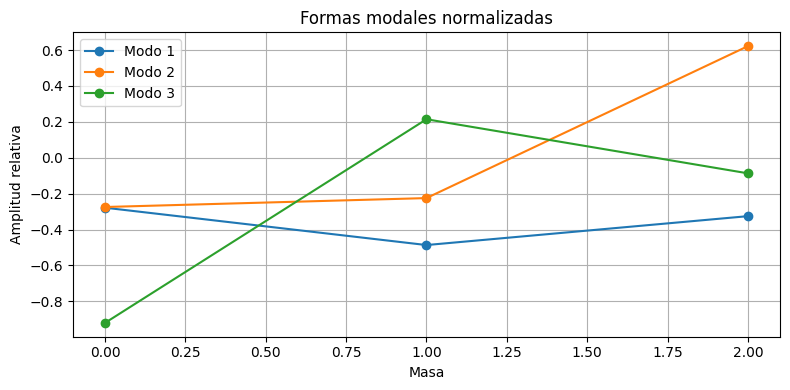

In [13]:
#Aquí va su código
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Constantes simbólicas
k = 1  # Solo afecta escala
m = 1  # Lo mismo, ya que trabajamos con ω/√(k/m)

# Matriz de rigidez (K)
K = k * np.array([
    [2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]
])

# Matriz de masa (M)
M = m * np.array([
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 2]
])

# Resolver el sistema generalizado de autovalores
# K v = λ M v  →  λ = ω²
eigenvals, eigenvecs = eigh(K, M)

# Ordenamos las frecuencias y modos
idx = np.argsort(eigenvals)
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:, idx]

# Frecuencias naturales (en unidades de sqrt(k/m))
omegas = np.sqrt(eigenvals)

# Mostrar resultados
print("Frecuencias naturales (en unidades de sqrt(k/m)):")
for i, omega in enumerate(omegas, 1):
    print(f"ω_{i} = {omega:.4f}")

print("\nFormas modales (columnas):")
print(eigenvecs)

# Graficar las formas modales
plt.figure(figsize=(8, 4))
for i in range(3):
    plt.plot(eigenvecs[:, i], 'o-', label=f'Modo {i+1}')
plt.xlabel('Masa')
plt.ylabel('Amplitud relativa')
plt.title('Formas modales normalizadas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()